# 分類（Classification）

在這個實驗中，你將比較 **迴歸（Regression）** 與 **分類（Classification）** 兩種問題的差異。

In [1]:
import sys, os
import numpy as np
try:
    %matplotlib widget
except:
    %matplotlib inline
    print("Colab not support matplotlib widget")
import matplotlib.pyplot as plt
from pathlib import Path


#region 匯入資料
def find_repo_root(marker="README.md"):
    cur = Path.cwd()
    while cur != cur.parent:  # 防止無限迴圈，到達檔案系統根目錄就停
        if (cur / marker).exists():
            return cur
        cur = cur.parent
    return None


def import_data_from_github():
    import os, urllib.request, pathlib, shutil
    
    def isRunningInColab() -> bool:
        return "google.colab" in sys.modules

    def isRunningInJupyterLab() -> bool:
        try:
            import jupyterlab
            return True
        except ImportError:
            return False
        
    def detect_env():
        from IPython import get_ipython
        if isRunningInColab():
            return "Colab"
        elif isRunningInJupyterLab():
            return "JupyterLab"
        elif "notebook" in str(type(get_ipython())).lower():
            return "Jupyter Notebook"
        else:
            return "Unknown"
        
    def get_utils_dir(env): 
        if env == "Colab": 
            if "/content" not in sys.path:
                sys.path.insert(0, "/content")
            return "/content/utils"
        else:
            return Path.cwd() / "utils"

    env = detect_env()
    UTILS_DIR = get_utils_dir(env)
    REPO_DIR = "Machine-Learning-Lab"

    #shutil.rmtree(UTILS_DIR, ignore_errors=True)
    os.makedirs(UTILS_DIR, exist_ok=True)

    BASE = f"https://raw.githubusercontent.com/mz038197/{REPO_DIR}/main"
    urllib.request.urlretrieve(f"{BASE}/utils/lab_utils_common_classification.py", f"{UTILS_DIR}/lab_utils_common_classification.py")
    urllib.request.urlretrieve(f"{BASE}/utils/plt_one_addpt_onclick.py", f"{UTILS_DIR}/plt_one_addpt_onclick.py")
    urllib.request.urlretrieve(f"{BASE}/utils/deeplearning.mplstyle", f"{UTILS_DIR}/deeplearning.mplstyle")


repo_root = find_repo_root()

if repo_root is None:
    import_data_from_github()
    repo_root = Path.cwd()
    

os.chdir(repo_root)
print(f"✅ 切換工作目錄至 {Path.cwd()}")
sys.path.append(str(repo_root)) if str(repo_root) not in sys.path else None
print(f"✅ 加入到系統路徑")

from utils.lab_utils_common_classification import dlc, plot_data
from utils.plt_one_addpt_onclick import plt_one_addpt_onclick

plt.style.use('utils/deeplearning.mplstyle')
print("✅ 匯入模組及設定繪圖樣式")
#endregion

✅ 切換工作目錄至 d:\Work\Python\Machine-Learning-Lab
✅ 加入到系統路徑
✅ 匯入模組及設定繪圖樣式


## 分類問題（Classification Problems）

分類問題的例子包含：

判斷電子郵件是**垃圾郵件**或**非垃圾郵件**、判斷腫瘤是**惡性**或**良性**等。這些特別屬於**二元分類（binary classification）**：每個樣本只會落在兩種可能結果之一。結果常用成對方式描述，例如：**正例/負例**、**是/否**、**真/假**、**1/0**。

在分類資料集的視覺化中，常用不同符號代表不同類別。以下圖中使用 **X** 代表正例（positive），使用 **O** 代表負例（negative）。

In [3]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

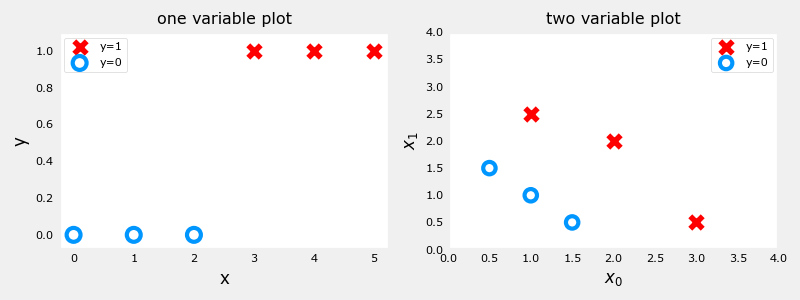

In [4]:
pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

#plot 2, two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()


請注意上方兩張圖：
- 在**單一變數**的圖中：
  - 正例同時用紅色 **X** 表示，且標記在 **y=1**。
  - 負例用藍色 **O** 表示，且標記在 **y=0**。
  - 回想線性迴歸的情況：目標值 **y** 不會只限制為兩個值，而是可以是任意連續數值。
- 在**兩個變數**的圖中，因為是 2D 平面，沒有額外的 y 軸來放類別：
  - 正例用紅色 **X** 表示。
  - 負例用藍色 **O** 表示。
  - 回想多變數線性迴歸的情況：若要把連續目標值畫出來，通常會需要 3D 圖形。

## 使用線性迴歸的做法
上一週你使用**線性迴歸**建立預測模型。這裡我們用課堂中的簡化範例，嘗試把同樣的方法套用到分類問題上：根據腫瘤大小，預測腫瘤是**良性**或**惡性**。

請依序操作：
- 點擊 **Run Linear Regression**，為目前資料找出最佳的線性迴歸模型。
  - 你會發現得到的線性模型與資料分佈**並不吻合**。

改善的一種做法是加入**閾值（threshold）**：
- 勾選 **Toggle 0.5 threshold**，顯示套用閾值後的預測結果。
  - 這時看起來預測效果變好，與資料較一致。

- **重要**：請在最右側（腫瘤尺寸很大、接近 10 的位置）新增更多「惡性」資料點，然後再次執行線性迴歸。
  - 你會發現：模型為了配合新加入的右側資料點，反而把 **x=3** 的點預測錯了。

- 若要清除/重畫圖形，請重新執行包含繪圖指令的那個 cell。

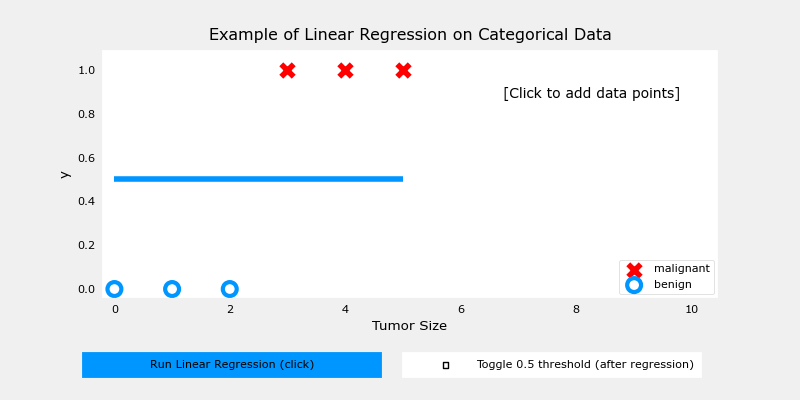

In [6]:
w_in = np.zeros((1))
b_in = 0
plt.close('all') 
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=False)

上述例子說明：**線性模型並不適合直接用來描述類別（categorical）資料**。接下來的實驗將介紹如何把模型延伸，來更好地處理分類問題。

## 恭喜完成！
在這個實驗中，你已經：
- 觀察並繪製分類（類別）資料集
- 理解為什麼**線性迴歸不足以解決分類問題**